In [1]:
import ginsim
import pypint
import biolqm
import maboss

from colomoto_jupyter import tabulate
from colomoto.temporal_logics import *
from itertools import combinations
from functools import reduce

import sys
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame

This notebook has been executed using the docker image `colomoto/colomoto-docker:2020-12-01`

# Model of Human Monocyte to moDC differentation in vitro 

We have integrated published data on the main signaling cascades involved in the differentiation of monocytes into moDCs. We also integrated novel putative transcriptional regulations inferred from the analysis of regulatory regions. Upon stimulation with IL4 and CSF2, monocytes differentiate into moDCs, while upon stimulation by CSF2 but not IL4, they differentiate into Macrophages.

The model of monocyte to moDC differentation was implement with GINsim v3.0 (http://ginsim.org).

## GINsim analysis

In [2]:
# Load the model and convert it to bioLQM
lrg = ginsim.load("Karen_MoDC_2Feb2021.zginml")
lqm = ginsim.to_biolqm(lrg)

ginsim.show(lrg)

The regulatory graph is compossed by 95 nodes, two fo those are the inputs: CSF2 and IL4 (in green), that are necesary for moDC differentiation. In yellow we have the transcription factors, in purple are the nodes that correspond to monocytes, in blue the specific moDC markers and in orange are the specific markers for macrophages.

## bioLQM analysis

In [3]:
# Define reporter components
reporter_components = ["CSF2R", "IL4R", "AhR", "IRF4", "IRF8", "MAFB", "KLF4", "STAT6", "CD1A", "CD209", "CCDC151", "CD206","SELL","CD14", "BECN1"]

The model has 4 stable states, which are displayed in a table by the following command line.

In [4]:
# Find fixed points, also called stable states
fpsr = biolqm.fixpoints(lqm, autoconvert=False)

# Generation of a python dataframe containing all stable states, easy tbo filter.
fpsdf = biolqm.states_to_dataframe(fpsr)

fpsdf

,CSF2,IL4,CSF2R,IL4R,AhR,AP1,ATF1,BATF3,CEBPa,CEBPb,FOS,cMYC,CREB,ELK4,FOXO1,IRF4,IRF8,KLF4,MAFB,NFKB1_RelA,NFKB2,NR4A1,PRDM1,PU1,STAT3,STAT5,STAT6,USF1,NCOR2,JAK2,Src,PI3K,PIP3,AKT,PTEN,MEK1,MAGI1,CLIP1,mTORC1,SHC_GRB2_mSOS,RAS,RAF,ERK,JUN,JNK,TAU,CPLA2,FLT3,GSK3B,IKK,JAK3,JAK1,SHP1,CIITA,ITGAX,LnC_DC,IL4_gene,DUOX1,SLAMF1,MAOA,HLA_DR,ALOX15,TIMP3,DUSP6,CCL2,CCL22,TLR3,TLR4,TLR6,TLR7,TLR8,CD48,CD1A,CD1B,CD1C,CD40,CD86,CD83,CD209,CD141,CD226,DEC205,DCIR,Tet2,PTPN1,SOCS,CD14,SELL,CD163,CD206,MERTK,CCDC151,BCL2,BECN1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0
2,1,0,1,0,0,1,0,1,0,1,1,0,1,1,1,0,1,0,1,1,1,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,1
3,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,0,0,0,1,1,1,1,2,2,1,1,1,1,0,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0


The stable states can be visualised directly on the network (drawn with GINsim) by using the following command, which is illustrated below for the stable state corresponding to moDC stage (with index 10).

In [5]:
# Displaying the moDC commitment stable state
ginsim.show(lrg,fpsr[1], save="moDCs_csf2_il4.svg")

/notebook/moDCs_csf2_il4.svg

These stable states can be projected onto a more compact set of markers.

In [6]:
# Generation of a table listing all stable states projected on reporter components
fpsdfproj = biolqm.states_to_dataframe( fpsr.project_on_components(reporter_components) )
fpsdfproj

,CSF2R,IL4R,AhR,IRF4,IRF8,KLF4,MAFB,STAT6,CD1A,CD209,CD14,SELL,CD206,CCDC151,BECN1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,1,0,1,0,0,1,1,0,0,0
2,1,0,0,0,1,0,1,0,0,0,0,0,1,1,1
3,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0


These stable states correspond to nil, Monocyte, Macrophage and moDC fates, respectively. 

## Define mutant versions of the model and compute the corresponding stable state patterns

In [7]:
#List of perturbations to test
perturbations = ["PU1%0",
                "JAK3%0",
                "NCOR2%0",
                "AhR%0",
                "IRF4%0",
                "STAT6%1",
                "MAFB%0",
                "IRF8%0",
                "CEBPb%0"]

In [8]:
# Define dictionaries to store attractors for each perturbation
fixpointlist = {}

# Trapspacelist is used to find potential cyclic attractors.
#trapspacelist = {}

for p in perturbations:
    print(p)
    fpsdf = biolqm.fixpoints(biolqm.perturbation(lqm, p))
    if fpsdf:
        fixpointlist[p] = fpsdf
        sys.displayhook(tabulate( fpsdf ))

    else:
        # No stable state found: look for trapspaces
        traps = biolqm.trapspace(biolqm.perturbation(lqm, p))
        sys.displayhook(tabulate( traps ))
    print()

PU1%0


,CSF2,IL4,CSF2R,IL4R,AhR,AP1,ATF1,BATF3,CEBPa,CEBPb,FOS,cMYC,CREB,ELK4,FOXO1,IRF4,IRF8,KLF4,MAFB,NFKB1_RelA,NFKB2,NR4A1,PRDM1,PU1,STAT3,STAT5,STAT6,USF1,NCOR2,JAK2,Src,PI3K,PIP3,AKT,PTEN,MEK1,MAGI1,CLIP1,mTORC1,SHC_GRB2_mSOS,RAS,RAF,ERK,JUN,JNK,TAU,CPLA2,FLT3,GSK3B,IKK,JAK3,JAK1,SHP1,CIITA,ITGAX,LnC_DC,IL4_gene,DUOX1,SLAMF1,MAOA,HLA_DR,ALOX15,TIMP3,DUSP6,CCL2,CCL22,TLR3,TLR4,TLR6,TLR7,TLR8,CD48,CD1A,CD1B,CD1C,CD40,CD86,CD83,CD209,CD141,CD226,DEC205,DCIR,Tet2,PTPN1,SOCS,CD14,SELL,CD163,CD206,MERTK,CCDC151,BCL2,BECN1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,1,1,1,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,1,1,1,0,0,2,1,1,0,1,1,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0



JAK3%0


,CSF2,IL4,CSF2R,IL4R,AhR,AP1,ATF1,BATF3,CEBPa,CEBPb,FOS,cMYC,CREB,ELK4,FOXO1,IRF4,IRF8,KLF4,MAFB,NFKB1_RelA,NFKB2,NR4A1,PRDM1,PU1,STAT3,STAT5,STAT6,USF1,NCOR2,JAK2,Src,PI3K,PIP3,AKT,PTEN,MEK1,MAGI1,CLIP1,mTORC1,SHC_GRB2_mSOS,RAS,RAF,ERK,JUN,JNK,TAU,CPLA2,FLT3,GSK3B,IKK,JAK3,JAK1,SHP1,CIITA,ITGAX,LnC_DC,IL4_gene,DUOX1,SLAMF1,MAOA,HLA_DR,ALOX15,TIMP3,DUSP6,CCL2,CCL22,TLR3,TLR4,TLR6,TLR7,TLR8,CD48,CD1A,CD1B,CD1C,CD40,CD86,CD83,CD209,CD141,CD226,DEC205,DCIR,Tet2,PTPN1,SOCS,CD14,SELL,CD163,CD206,MERTK,CCDC151,BCL2,BECN1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,1,0,1,0,0,1,0,1,0,1,1,0,1,1,1,0,1,0,1,1,1,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,1
3,1,1,1,1,0,1,0,1,0,1,1,0,1,1,1,0,1,0,1,1,1,0,0,1,1,1,0,1,0,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0



NCOR2%0


,CSF2,IL4,CSF2R,IL4R,AhR,AP1,ATF1,BATF3,CEBPa,CEBPb,FOS,cMYC,CREB,ELK4,FOXO1,IRF4,IRF8,KLF4,MAFB,NFKB1_RelA,NFKB2,NR4A1,PRDM1,PU1,STAT3,STAT5,STAT6,USF1,NCOR2,JAK2,Src,PI3K,PIP3,AKT,PTEN,MEK1,MAGI1,CLIP1,mTORC1,SHC_GRB2_mSOS,RAS,RAF,ERK,JUN,JNK,TAU,CPLA2,FLT3,GSK3B,IKK,JAK3,JAK1,SHP1,CIITA,ITGAX,LnC_DC,IL4_gene,DUOX1,SLAMF1,MAOA,HLA_DR,ALOX15,TIMP3,DUSP6,CCL2,CCL22,TLR3,TLR4,TLR6,TLR7,TLR8,CD48,CD1A,CD1B,CD1C,CD40,CD86,CD83,CD209,CD141,CD226,DEC205,DCIR,Tet2,PTPN1,SOCS,CD14,SELL,CD163,CD206,MERTK,CCDC151,BCL2,BECN1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0
2,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0
3,1,0,1,0,0,1,0,1,0,1,1,0,1,1,1,0,1,0,1,1,1,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,1
4,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,0,1,1,0,1,1,1,0,2,1,1,1,1,0,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
5,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,0,1,1,1,0,2,2,1,1,1,0,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0



AhR%0


,CSF2,IL4,CSF2R,IL4R,AhR,AP1,ATF1,BATF3,CEBPa,CEBPb,FOS,cMYC,CREB,ELK4,FOXO1,IRF4,IRF8,KLF4,MAFB,NFKB1_RelA,NFKB2,NR4A1,PRDM1,PU1,STAT3,STAT5,STAT6,USF1,NCOR2,JAK2,Src,PI3K,PIP3,AKT,PTEN,MEK1,MAGI1,CLIP1,mTORC1,SHC_GRB2_mSOS,RAS,RAF,ERK,JUN,JNK,TAU,CPLA2,FLT3,GSK3B,IKK,JAK3,JAK1,SHP1,CIITA,ITGAX,LnC_DC,IL4_gene,DUOX1,SLAMF1,MAOA,HLA_DR,ALOX15,TIMP3,DUSP6,CCL2,CCL22,TLR3,TLR4,TLR6,TLR7,TLR8,CD48,CD1A,CD1B,CD1C,CD40,CD86,CD83,CD209,CD141,CD226,DEC205,DCIR,Tet2,PTPN1,SOCS,CD14,SELL,CD163,CD206,MERTK,CCDC151,BCL2,BECN1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
2,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
3,1,0,1,0,0,1,0,1,0,1,1,0,1,1,1,0,1,0,1,1,1,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,1
4,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,0,0,0,0,1,1,1,0,2,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,1,1,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
5,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,0,1,1,1,0,2,2,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0



IRF4%0


,CSF2,IL4,CSF2R,IL4R,AhR,AP1,ATF1,BATF3,CEBPa,CEBPb,FOS,cMYC,CREB,ELK4,FOXO1,IRF4,IRF8,KLF4,MAFB,NFKB1_RelA,NFKB2,NR4A1,PRDM1,PU1,STAT3,STAT5,STAT6,USF1,NCOR2,JAK2,Src,PI3K,PIP3,AKT,PTEN,MEK1,MAGI1,CLIP1,mTORC1,SHC_GRB2_mSOS,RAS,RAF,ERK,JUN,JNK,TAU,CPLA2,FLT3,GSK3B,IKK,JAK3,JAK1,SHP1,CIITA,ITGAX,LnC_DC,IL4_gene,DUOX1,SLAMF1,MAOA,HLA_DR,ALOX15,TIMP3,DUSP6,CCL2,CCL22,TLR3,TLR4,TLR6,TLR7,TLR8,CD48,CD1A,CD1B,CD1C,CD40,CD86,CD83,CD209,CD141,CD226,DEC205,DCIR,Tet2,PTPN1,SOCS,CD14,SELL,CD163,CD206,MERTK,CCDC151,BCL2,BECN1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0
2,1,0,1,0,0,1,0,1,0,1,1,0,1,1,1,0,1,0,1,1,1,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,1
3,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0,0,0,1,1,1,0,2,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,1,1,0,1,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0



STAT6%1


,CSF2,IL4,CSF2R,IL4R,AhR,AP1,ATF1,BATF3,CEBPa,CEBPb,FOS,cMYC,CREB,ELK4,FOXO1,IRF4,IRF8,KLF4,MAFB,NFKB1_RelA,NFKB2,NR4A1,PRDM1,PU1,STAT3,STAT5,STAT6,USF1,NCOR2,JAK2,Src,PI3K,PIP3,AKT,PTEN,MEK1,MAGI1,CLIP1,mTORC1,SHC_GRB2_mSOS,RAS,RAF,ERK,JUN,JNK,TAU,CPLA2,FLT3,GSK3B,IKK,JAK3,JAK1,SHP1,CIITA,ITGAX,LnC_DC,IL4_gene,DUOX1,SLAMF1,MAOA,HLA_DR,ALOX15,TIMP3,DUSP6,CCL2,CCL22,TLR3,TLR4,TLR6,TLR7,TLR8,CD48,CD1A,CD1B,CD1C,CD40,CD86,CD83,CD209,CD141,CD226,DEC205,DCIR,Tet2,PTPN1,SOCS,CD14,SELL,CD163,CD206,MERTK,CCDC151,BCL2,BECN1
0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
1,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0
2,1,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,0,0,1,1,1,1,2,0,1,1,1,1,0,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1
3,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,0,0,0,1,1,1,1,2,2,1,1,1,1,0,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0



MAFB%0


,CSF2,IL4,CSF2R,IL4R,AhR,AP1,ATF1,BATF3,CEBPa,CEBPb,FOS,cMYC,CREB,ELK4,FOXO1,IRF4,IRF8,KLF4,MAFB,NFKB1_RelA,NFKB2,NR4A1,PRDM1,PU1,STAT3,STAT5,STAT6,USF1,NCOR2,JAK2,Src,PI3K,PIP3,AKT,PTEN,MEK1,MAGI1,CLIP1,mTORC1,SHC_GRB2_mSOS,RAS,RAF,ERK,JUN,JNK,TAU,CPLA2,FLT3,GSK3B,IKK,JAK3,JAK1,SHP1,CIITA,ITGAX,LnC_DC,IL4_gene,DUOX1,SLAMF1,MAOA,HLA_DR,ALOX15,TIMP3,DUSP6,CCL2,CCL22,TLR3,TLR4,TLR6,TLR7,TLR8,CD48,CD1A,CD1B,CD1C,CD40,CD86,CD83,CD209,CD141,CD226,DEC205,DCIR,Tet2,PTPN1,SOCS,CD14,SELL,CD163,CD206,MERTK,CCDC151,BCL2,BECN1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0
2,1,0,1,0,0,1,0,1,0,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,0,0,0,1,1,1,1,2,2,1,1,1,1,0,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0



IRF8%0


,CSF2,IL4,CSF2R,IL4R,AhR,AP1,ATF1,BATF3,CEBPa,CEBPb,FOS,cMYC,CREB,ELK4,FOXO1,IRF4,IRF8,KLF4,MAFB,NFKB1_RelA,NFKB2,NR4A1,PRDM1,PU1,STAT3,STAT5,STAT6,USF1,NCOR2,JAK2,Src,PI3K,PIP3,AKT,PTEN,MEK1,MAGI1,CLIP1,mTORC1,SHC_GRB2_mSOS,RAS,RAF,ERK,JUN,JNK,TAU,CPLA2,FLT3,GSK3B,IKK,JAK3,JAK1,SHP1,CIITA,ITGAX,LnC_DC,IL4_gene,DUOX1,SLAMF1,MAOA,HLA_DR,ALOX15,TIMP3,DUSP6,CCL2,CCL22,TLR3,TLR4,TLR6,TLR7,TLR8,CD48,CD1A,CD1B,CD1C,CD40,CD86,CD83,CD209,CD141,CD226,DEC205,DCIR,Tet2,PTPN1,SOCS,CD14,SELL,CD163,CD206,MERTK,CCDC151,BCL2,BECN1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0
2,1,0,1,0,0,1,0,1,0,0,1,0,1,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,0,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,1,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,0,0,0,1,1,1,1,2,2,1,1,1,1,0,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0



CEBPb%0


,CSF2,IL4,CSF2R,IL4R,AhR,AP1,ATF1,BATF3,CEBPa,CEBPb,FOS,cMYC,CREB,ELK4,FOXO1,IRF4,IRF8,KLF4,MAFB,NFKB1_RelA,NFKB2,NR4A1,PRDM1,PU1,STAT3,STAT5,STAT6,USF1,NCOR2,JAK2,Src,PI3K,PIP3,AKT,PTEN,MEK1,MAGI1,CLIP1,mTORC1,SHC_GRB2_mSOS,RAS,RAF,ERK,JUN,JNK,TAU,CPLA2,FLT3,GSK3B,IKK,JAK3,JAK1,SHP1,CIITA,ITGAX,LnC_DC,IL4_gene,DUOX1,SLAMF1,MAOA,HLA_DR,ALOX15,TIMP3,DUSP6,CCL2,CCL22,TLR3,TLR4,TLR6,TLR7,TLR8,CD48,CD1A,CD1B,CD1C,CD40,CD86,CD83,CD209,CD141,CD226,DEC205,DCIR,Tet2,PTPN1,SOCS,CD14,SELL,CD163,CD206,MERTK,CCDC151,BCL2,BECN1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0
2,1,0,1,0,0,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1
3,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,0,0,0,1,1,1,1,2,2,1,1,1,1,0,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0


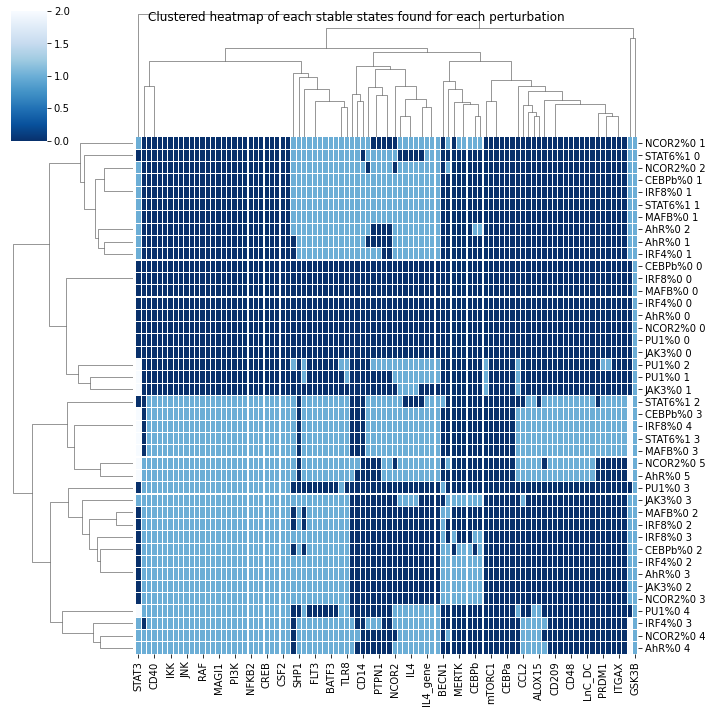

In [9]:
import seaborn as sns

# List of perturbations with the nb of stable states
perturbstates=[]
trappedstates=[]
#List of table state values same order as perturbstates
stablestates = [] 
tstates = [] 

# List of nodes
nodelist = ['CSF2','IL4','CSF2R','IL4R','AhR','AP1','ATF1','BATF3','CEBPa','CEBPb','FOS','cMYC','CREB','ELK4','FOXO1','IRF4','IRF8','KLF4','MAFB','NFKB1_RelA','NFKB2','NR4A1','PRDM1','PU1','STAT3','STAT5','STAT6','USF1','NCOR2','JAK2','Src','PI3K','PIP3','AKT','PTEN','MEK1','MAGI1','CLIP1','mTORC1','SHC_GRB2_mSOS','RAS','RAF','ERK','JUN','JNK','TAU','CPLA2','FLT3','GSK3B','IKK','JAK3','JAK1','SHP1','CIITA','ITGAX','LnC_DC','IL4_gene','DUOX1','SLAMF1','MAOA','HLA_DR','ALOX15','TIMP3','DUSP6','CCL2','CCL22','TLR3','TLR4','TLR6','TLR7','TLR8','CD48','CD1A','CD1B','CD1C','CD40','CD86','CD83','CD209','CD141','CD226','DEC205','DCIR','Tet2','PTPN1','SOCS','CD14','SELL','CD163','CD206','MERTK','CCDC151','BCL2','BECN1']

for k,v in fixpointlist.items():   
    for i in range(0,len(v)):
        listSS = []
        for key, val in v[i].items():
            listSS.append(val)
        stablestates.append(listSS)
        perturbstates.append(str(k)+' '+str(i))

# Create dataframe: columns = nodes, rows = perturbations
df = DataFrame(data=stablestates)
df.columns = nodelist
df.index = perturbstates

# Generate clustered heatmap
cm = sns.clustermap(df, metric='euclidean', cmap = 'Blues_r', yticklabels=True, linewidths=0.1)
cm.fig.suptitle('Clustered heatmap of each stable states found for each perturbation')

#Save as figure
plt.savefig('heatmap_mutations28Jan2021.svg')

## Verification of comitment pattern reachability using pint

In [10]:
# Translate the original model into a a discrete automata using bioloqm
lqm = ginsim.to_biolqm(lrg)
an = biolqm.to_pint(lqm)
# an stands for automata network
# Definition of an initial state corresponding to intial monocyte state but in the presence of CSF2 and IL4:
an = an.having(CSF2R=0,IL4R=0,AhR=1,CEBPb=0,IRF4=0,IRF8=1,KLF4=1,MAFB=0,PRDM1=0,PU1=1,STAT3=0,STAT6=1,NCOR2=0, CSF2=1, IL4=1)
# Definition of an initial state corresponding to intial monocyte state but in the presence of CSF2 but not IL4:
# an = an.having(CSF2R=0,IL4R=0,AhR=1,CEBPb=0,IRF4=0,IRF8=1,KLF4=1,MAFB=0,PRDM1=0,PU1=1,STAT3=0,STAT6=1,NCOR2=0, CSF2=1, IL4=0)
# Definition of an initial state corresponding to intial monocyte state but in the presence of IL4 but not CSF2:
#an = an.having(CSF2R=0,IL4R=0,AhR=1,CEBPb=0,IRF4=0,IRF8=1,KLF4=1,MAFB=0,PRDM1=0,PU1=1,STAT3=0,STAT6=1,NCOR2=0,CSF2=0,IL4=1)
# Definition of a target pattern corresponding to moDC in pint and verify its reachability for the wildtype model
#an.reachability("AhR=1,IRF4=1,CD1A=1,CD209=1")
an.reachability("CEBPb=1,MAFB=1")

# This may take about a minute on a personal computer...


True

## Stochastic simulations using MaBoSS

In [11]:
# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, ["AhR", "IRF4", "IRF8", "MAFB", "KLF4", "STAT6", "CD1A", "CD209", "CCDC151", "CD206","SELL","CD14"])

# Defining ON components at initial state, corresponding to moDC
# Per default, all nodes are set to zero at initial state
# ...
# commands to set the initial state, launch the simulation and display the results  
    mo_ON_Nodes = ('CSF2','IL4','AhR','AP1','ATF1','BATF3','FOS','CREB','ELK4','FOXO1','NR4A1','NFKB1_RelA','NFKB2','JAK2','PU1_b1','IRF8','STAT5','KLF4','STAT6','USF1','Src','PI3K','PTEN','MEK1','MAGI1','CLIP1','RAS','RAF','MEK','JUN','JNK','IKK')
    maboss.set_nodes_istate(mbs, mo_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_node_trajectory(until=40)
    simres.plot_entropy_trajectory(until=40)

In [12]:
mb = ginsim.to_maboss(lrg)
#maboss.wg_set_output(mb)
maboss.set_output(mb, ["CD1A", "CD209", "CD14", "SELL", "CCDC151", "CD206"])
mb.update_parameters(time_tick=0.5, max_time=25, sample_count=1000)

### Maboss with CSF2 and IL4

In this section is the simulation for the model taking as inputs CSF2 an IL4

In [13]:
mbCsf2IL4 = mb.copy()

In [14]:
#maboss.wg_set_istate(mb)
maboss.set_nodes_istate(mbCsf2IL4, ["IL4", "CSF2"], [0, 1])

In [15]:
%time resCI = mbCsf2IL4.run()

CPU times: user 19.9 ms, sys: 30.6 ms, total: 50.5 ms
Wall time: 6.32 s


CPU times: user 1.85 s, sys: 326 ms, total: 2.17 s
Wall time: 2.36 s


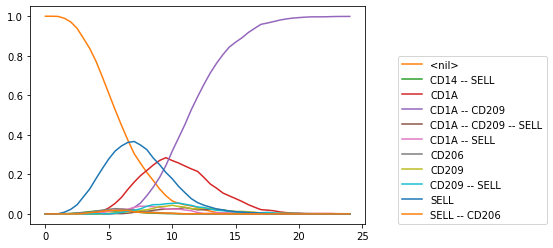

In [16]:
%time resCI.plot_trajectory()
plt.savefig('csf2_il4.svg')

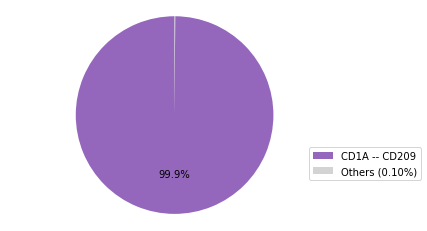

In [17]:
resCI.plot_piechart(autopct=True)

### Maboss with IL4

In this section is the simulation for the model taking as input IL4

In [18]:
mbIL4 = mb.copy()

In [19]:
#maboss.wg_set_istate(mb)
maboss.set_nodes_istate(mbIL4, ["IL4"], [0, 1])

In [20]:
%time resIL4 = mbIL4.run()

CPU times: user 66.6 ms, sys: 35.2 ms, total: 102 ms
Wall time: 2.17 s


CPU times: user 432 ms, sys: 58.8 ms, total: 491 ms
Wall time: 603 ms


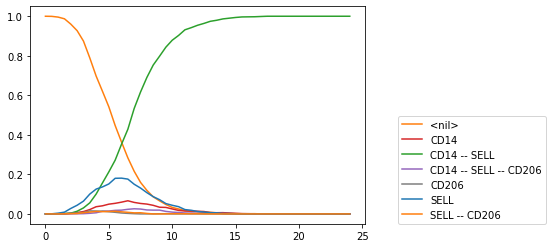

In [21]:
%time resIL4.plot_trajectory()
plt.savefig('maboss_il4.svg')

CPU times: user 131 ms, sys: 10.2 ms, total: 141 ms
Wall time: 209 ms


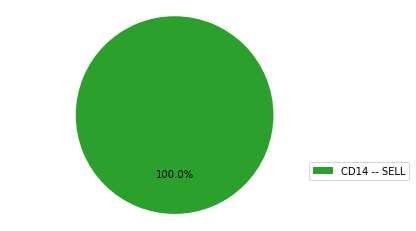

In [22]:
%time resIL4.plot_piechart(autopct=True)

### Maboss with CSF2

In this section is the simulation for the model taking as input CSF2

In [23]:
mbCsf2 = mb.copy()

In [24]:
#maboss.wg_set_istate(mb)
maboss.set_nodes_istate(mbCsf2, ["CSF2"], [0, 1])

In [25]:
%time resCsf2 = mbCsf2.run()

CPU times: user 10.3 ms, sys: 23.3 ms, total: 33.6 ms
Wall time: 3.18 s


CPU times: user 335 ms, sys: 46.1 ms, total: 381 ms
Wall time: 452 ms


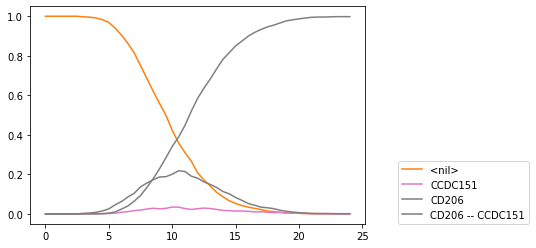

In [26]:
%time resCsf2.plot_trajectory()
plt.savefig('maboss_csf2.svg')

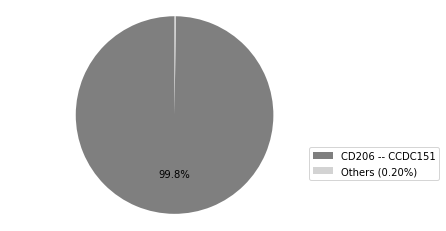

In [27]:
resCsf2.plot_piechart(autopct=True)

# Value propagation analysis

## Helper functions

Some helper functions and color mapping rules were set to perform value propagation and vizualize the results. As shown in Hernandez et al 2020.

In [28]:
# Transforms a dictionary into a dash-like pattern used for space restrictions.
# If a model has 4 components A, B, C, D in this order,
#  {A:0, D:1} => "0--1"
def dash_pattern(model, dict_vals):
    specific_comps = dict_vals.keys()
    str_pattern = ""
    for comp in model.getComponents():
        if comp.toString() in specific_comps:
            str_pattern += str(dict_vals.get(comp.toString()))
        else :
            str_pattern += "-"
    return(str_pattern)

def restrict_model(model, **dict_vals):
    pattern = dash_pattern(lqm, dict_vals)
    return biolqm.restrict(lqm, pattern)

def fill_fixed(data, names, functions, mddman):
    all_values = [f for f in functions]
    for comp, func in zip(names, functions):
        if mddman.isleaf(func): data[comp] = func
        else: data[comp] = -1
    

def get_fixed_pattern(all_names, model, as_dict=False):
    # Build a container for the results
    pattern = {key: 100 for key in all_names}
    
    # Model manager and core components
    mddman = model.getMDDManager()
    core_components = [node.getNodeID() for node in model.getComponents()]
    extra_components = [node.getNodeID() for node in model.getExtraComponents()]
    
    # 1/ Non-extra values: if the model was not reduced, core components may also contain fixed values
    fill_fixed(pattern, core_components, model.getLogicalFunctions(), mddman)

    # Special value for input components
    for node in model.getComponents():
        if node.isInput():
            pattern[node.getNodeID()] = -2

    
    # 2/ Extra values : only available after reduction/percolation
    # Functions of each component
    fill_fixed(pattern, extra_components, model.getExtraLogicalFunctions(), mddman)

    if as_dict: return pattern
    return pd.Series(pattern, dtype=np.byte).values.tobytes()

def compare_fixed_pattern(all_names, model1, model2, as_dict=False):
    pattern1 = get_fixed_pattern(all_names, model1, as_dict=True)
    pattern2 = get_fixed_pattern(all_names, model2, as_dict=True)
    
    pattern = {}
    for c in pattern1:
        v1 = pattern1[c]
        v2 = pattern2[c]
        
        if v1 == v2: pattern[c] = v1
        elif v1 < 0: pattern[c] = 10 + v2
        elif v2 < 0: pattern[c] = 20 + v1
        else: pattern[c] = 100

    if as_dict: return pattern
    return pd.Series(pattern, dtype=np.byte).values.tobytes()


def show_fixed_comparison(lrg, restricted_model1, restricted_model2, styler, save=None):
    name_components = [ n.getId() for n in lrg.getNodeOrder() ]
    pattern = compare_fixed_pattern(name_components, restricted_model1, restricted_model2)
    styler.setState( pattern )
    return ginsim.show(lrg, style=styler, save=save)    


def show_fixed(lrg, restricted_model, styler, save=None):
    name_components = [ n.getId() for n in lrg.getNodeOrder() ]
    fixed_pattern = get_fixed_pattern(name_components, restricted_model)
    styler.setState(fixed_pattern)
    return ginsim.show(lrg, style=styler, save=save)


# Define color mapping rules

# Style for a single fixed pattern
styler_fixed = ginsim.lrg_style(lrg)
styler_fixed.mapState2Color(0, 200, 25, 25)
styler_fixed.mapState2Color(1, 100, 175, 100)
styler_fixed.mapState2Color(2, 100, 225, 100)
styler_fixed.mapState2Color(-1, 255, 255, 255)
styler_fixed.mapState2Color(-2, 175, 175, 175)


# Style for comparing two patterns
styler_comp = ginsim.lrg_style(lrg)
styler_comp.mapState2Color(-2, 175, 175, 175) # INPUT: gray
styler_comp.mapState2Color(0, 255, 255, 180)  # OFF  in both: light yellow
styler_comp.mapState2Color(1, 255, 180, 120)  # ON   in both: light orange
styler_comp.mapState2Color(2, 255, 180, 120)  # HIGH in both: light orange
styler_comp.mapState2Color(-1, 255, 255, 255) # FREE in both: white
styler_comp.mapState2Color(10, 200, 255, 200) # OFF in the first: light green
styler_comp.mapState2Color(11, 125, 200, 125) # ON  in the first: dark green
styler_comp.mapState2Color(20, 200, 200, 255) # OFF in the second: light green
styler_comp.mapState2Color(21, 125, 125, 200) # ON  in the second: dark green
styler_comp.mapState2Color(100, 255, 180, 180) # Other (different values?): red

## Identify stable states

In [29]:
# Model simplification:
#   * Fix all inputs to their inactive state.
fixed = { str(n):0 for n in lqm.getComponents() if n.isInput()}

# Keep 'CSF2', 'IL4', as proper inputs 
for n in ('CSF2', 'IL4'):
    del(fixed[n])

# Fix inputs to their active state
fixed['CSF2R'] = 0

In [30]:
# Apply the simplifications defined above to reduce the model
m_reduced = biolqm.perturbation(lqm, " ".join([ "%s%%%s" % (k,v) for (k,v) in fixed.items() ]))
m_reduced = biolqm.reduce(m_reduced, ":fixed :purge :no-extra")

In [31]:
# Define reporter components
reporter_components = ["AhR", "IRF4", "IRF8", "MAFB", "KLF4", "STAT6", "CD1A", "CD209", "CCDC151", "CD206","SELL","CD14"]

fps = biolqm.fixpoints(m_reduced, autoconvert=False
      ).project_on_components( reporter_components )
df = biolqm.states_to_dataframe(fps)
df

,AhR,IRF4,IRF8,KLF4,MAFB,STAT6,CD1A,CD14,SELL,CD206
0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,0,1,1,0


## Percolate CSF2R and IL4R values

### No constrain

First we want to visualize fixed values on the model without any constraint. Fixed values will appear in white. This will be used as reference to see if percolating a value will change anything from this default setting.

In [32]:
# Reduce fixed values
lqm_model_fixed_reduced = biolqm.reduce(lqm, ":fixed :purge")
show_fixed(lrg, lqm_model_fixed_reduced, styler_fixed)

## CSF2R:0

In [33]:
# Percolate a value of 0 for CSF2R
lqm_model_restricted_csf2r_0 = restrict_model(lqm, CSF2R=0)
show_fixed(lrg, lqm_model_restricted_csf2r_0, styler_fixed)

## CSF2R:1

In [34]:
# Percolate a value of 1 for CSF2
lqm_model_restricted_csf2r_1 = restrict_model(lqm, CSF2R=1)
show_fixed(lrg, lqm_model_restricted_csf2r_1, styler_fixed, save="figure_percolation_csf2r_1")

Saving as figure_percolation_csf2r_1.svg


/notebook/figure_percolation_csf2r_1.svg

## Display fixed point

In [35]:
print("Before restriction : Total components : %d, Extra components : %d" % (len(lqm.getComponents()),
                                                        len(lqm.getExtraComponents())))
print("After restriction : Total components : %d, Extra components : %d" % (len(lqm_model_restricted_csf2r_1.getComponents()),
                                                        len(lqm_model_restricted_csf2r_1.getExtraComponents())))
#biolqm.fixpoints(lqm_model_restricted_csf2r_1, "extra")

Before restriction : Total components : 94, Extra components : 0
After restriction : Total components : 59, Extra components : 35


In [36]:
# Stable state pattern with signal
fix_points_csf2r_1_nb2 = {'i_CSF2':1, 'i_IL4':0, 'CSF2R':1, 'IL4R':0, 'AhR':0, 'AP1':0, 'ATF1':0, 'BATF3':0, 'CEBPa':0, 'CEBPb':0, 'FOS':0, 'cMYC':0, 'CREB':0, 'ELK4':0, 'FOXO1':0, 'IRF4':0, 'IRF8':0, 'KLF4':0, 'MAFB':0, 'NFKB1_RelA':0, 'NFKB2':0, 'NR4A1':0, 'PRDM1':0, 'PU1':0, 'STAT3':0, 'STAT5':0, 'STAT6':0, 'USF1':0, 'NCOR2':0, 'JAK2':0, 'Src':0, 'PI3K':0, 'PIP3':0, 'AKT':0, 'PTEN':0, 'MEK1':0, 'MAGI1':0, 'CLIP1':0, 'mTORC1':0, 'SHC_GRB2_mSOS':0, 'RAS':0, 'RAF':0, 'MEK':0, 'ERK':0, 'JUN':0, 'JNK':0, 'TAU':0, 'CPLA2':0, 'FLT3':0, 'GSK3B':0, 'IKK':0, 'JAK3':0, 'JAK1':0, 'SHP1':0, 'CIITA':0, 'ITGAX':0, 'LnC_DC':0, 'IL4_gene':0, 'DUOX1':0, 'SLAMF1':0, 'MAOA':0, 'HLA_DR':0, 'ALOX15':0, 'TIMP3':0, 'DUSP6':0, 'CCL2':0, 'CCL22':0, 'TLR3':0, 'TLR4':0, 'TLR6':0, 'TLR7':0, 'TLR8':0, 'CD48':0, 'CD1A':0, 'CD1B':0, 'CD1C':0, 'CD40':0, 'CD86':0, 'CD83':0, 'CD209':0, 'CD141':0, 'CD226':0, 'DEC205':0, 'DCIR':0, 'Tet2':0, 'PTPN1':0, 'SOCS':0, 'CD14':0, 'SELL':0, 'CD163':0, 'CD206':0, 'MERTK':0, 'CCDC151':0, 'BCL2':0, 'BECN1':0}
#fix_points_csf2r_1_nb2 = {'i_pMHCII_binding':1, 'i_pMHCII_agonist':1, 'i_pMHCII_dose':0, 'i_pMHCII_affinity':1, 'TCRalphabeta':0, 'pTCR':0, 'i_CD80':1, 'i_CD86':0, 'CD28':0, 'CTLA4':1, 'IDO_DC':1, 'i_ICOSLG':0, 'ICOS':0, 'i_CD5':0, 'i_ALCAM':0, 'CD6':0, 'i_CD274':0, 'i_PDCD1LG2':0, 'PDCD1':0, 'i_TNFRSF14':0, 'BTLA':0, 'i_LGALS9':0, 'TIM3':0, 'i_OX40L':0, 'OX40':0, 'i_cAMP':0, 'PKA':0, 'CD4':1, 'f_MAL':1, 'f_UNC119':1, 'f_RAB11A':1, 'f_PTPRJ':0, 'f_14_3_3':0, 'f_PRKDC':1, 'f_MDM2':0, 'f_NCKAP1L':1, 'f_NCKAP1':1, 'f_BAIAP2':1, 'f_CYFIP1':1, 'f_BRK1':1, 'f_WASF2':1, 'f_ABI1':1, 'f_ABI2':1, 'f_ACTR2':1, 'f_ACTR3':1, 'f_PRDX1':0, 'f_CRACR2A':1, 'f_ROS':0, 'f_RCAN1':0, 'f_CABIN1':0, 'f_AKAP5':0, 'f_BBC3':0, 'f_APAF1':0, 'f_DEPTOR':0, 'f_RICTOR':1, 'f_MLST8':1, 'f_MTOR':1, 'f_Glucose':1, 'MAP2K6':0, 'f_DUSP2':0, 'f_DUSP4':0, 'DUSP5':0, 'f_DUSP6':0, 'f_DUSP10':0, 'f_DUSP22':0, 'f_Axin1':0, 'f_SMAD3':0, 'f_Th1':0, 'f_BAT3':0, 'INF2':0, 'LCK':1, 'pY505LCK':1, 'pY394LCK':1, 'pS59LCK':100, 'LCK_activity':1, 'CSK':1, 'PAG1':1, 'LIME1':1, 'PTPN6':0, 'PTPN22':0, 'PTPRC':1, 'PTPN11':1, 'PP2A':1, 'CBL':0, 'CBLB':1, 'INPP5D':0, 'FYN':1, 'ZAP70':0, 'LAT':0, 'GRB2':0, 'SOS':0, 'GAB2':0, 'GRAP2':0, 'GRAP':0, 'LCP2':0, 'ITK':0, 'SHB':0, 'TXK':0, 'MAP4K1':1, 'MAP4K3':0, 'PLCG1_binding':0, 'PTEN':1, 'PI3K':0, 'PIP2':100, 'IP3':0, 'DAG':100, 'PIP3':0, 'PDPK1':0, 'AKT1':0, 'FOXO1':1, 'GSK3A':1, 'GSK3B':1, 'TP53':1, 'CDKN1A':1, 'CDKN1B':0, 'Quiescence':1, 'PCNA':0, 'CTNNB1':0, 'CCND1':0, 'MYC':0, 'Proliferation':0, 'PRKCQ':0, 'CARD11':0, 'BCL10':0, 'MALT1':0, 'MAP3K7':0, 'MAP3K3':0, 'CHUK':0, 'IKBKG':0, 'IKBKB':0, 'NFKBIA':1, 'NF_KB':0, 'CREBBP':1, 'FOXP3':0, 'CTLA4_out':0, 'Treg':0, 'BAD':1, 'BCL2L1':0, 'VDAC1':1, 'CYCS':1, 'Caspase9':0, 'Survival':0, 'Apoptosis':0, 'RPTOR':1, 'GYS1':0, 'Glycogenesis':0, 'mTORC2':1, 'mTORC1':0, 'RPS6KA1':0, 'RPS6KB1':0, 'TSC1_TSC2':1, 'RHEB':0, 'Growth':0, 'Triglyceride_synthesis':1, 'Protein_synthesis':0, 'NCK1':0, 'CDC42':0, 'WAS':0, 'RAC1':0, 'WAVE_cplx':0, 'ARP2_3':0, 'PAK1':0, 'LIMK1':0, 'CFL1':1, 'HCLS1':0, 'VAV1':0, 'SH3BP2':0, 'ABL1':1, 'Actin_polymerisation':0, 'RHOA':0, 'ROCK1':0, 'MLCP':1, 'Actin_contraction_migration':0, 'FYB':0, 'Adhesion_Integrin':0, 'IP3R1':0, 'Calcium_ER':1, 'Calcium_cyt':0, 'SERCA':0, 'STIM1':0, 'ORAI1':0, 'PMCA':0, 'Mitochondria':0, 'Calmodulin':0, 'Calcineurin':0, 'CAMK4':0, 'CAMK2G':1, 'NFAT_nuc':0, 'PDCD1_out':0, 'DGKA':0, 'Anergy':0, 'RASGRP1':0, 'HRAS':0, 'RAF1':0, 'MAP2K1':0, 'MAPK3':0, 'MAPK1':0, 'ELK1':0, 'FOS':0, 'MAP3K1':0, 'MAP3K11':1, 'MAP2K4':0, 'MAP2K7':0, 'JNK':0, 'JUN':0, 'GADD45A':1, 'ATF2':0, 'p38':0, 'RPS6KA4':0, 'RPS6KA5':0, 'CREB1':0, 'DUSP1':0, 'IL2':0, 'Differentiation':0, 'Th2':0, 'PLCG1':0}
# Display the model
ginsim.show(lrg, fix_points_csf2r_1_nb2)

## IL4R:0

In [37]:
# Percolate a value of 0 for IL4R
lqm_model_restricted_il4r_0 = restrict_model(lqm, IL4R=0)
show_fixed(lrg, lqm_model_restricted_il4r_0, styler_fixed)

## IL4R:1

In [38]:
# Percolate a value of 1 for IL4R
lqm_model_restricted_il4r_1 = restrict_model(lqm, IL4R=1)
show_fixed(lrg, lqm_model_restricted_il4r_1, styler_fixed, save="figure_percolation_il4r_1")

Saving as figure_percolation_il4r_1.svg


/notebook/figure_percolation_il4r_1.svg

## Fixed points for IL4R

In [39]:
# Fixpoint IL4R 1 and CSF2R unrestricted
#fixpoint_pdcd1_1_ctla4_star_nb1 = {'i_pMHCII_binding':1, 'i_pMHCII_agonist':1, 'i_pMHCII_dose':0, 'i_pMHCII_affinity':1, 'TCRalphabeta':0, 'pTCR':0, 'i_CD80':1, 'i_CD86':0, 'CD28':0, 'CTLA4':1, 'IDO_DC':1, 'i_ICOSLG':0, 'ICOS':0, 'i_CD5':0, 'i_ALCAM':0, 'CD6':0, 'i_CD274':1, 'i_PDCD1LG2':0, 'PDCD1':1, 'i_TNFRSF14':0, 'BTLA':0, 'i_LGALS9':0, 'TIM3':0, 'i_OX40L':0, 'OX40':0, 'i_cAMP':0, 'PKA':0, 'CD4':1, 'f_MAL':1, 'f_UNC119':1, 'f_RAB11A':1, 'f_PTPRJ':0, 'f_14_3_3':0, 'f_PRKDC':1, 'f_MDM2':0, 'f_NCKAP1L':1, 'f_NCKAP1':1, 'f_BAIAP2':1, 'f_CYFIP1':1, 'f_BRK1':1, 'f_WASF2':1, 'f_ABI1':1, 'f_ABI2':1, 'f_ACTR2':1, 'f_ACTR3':1, 'f_PRDX1':0, 'f_CRACR2A':1, 'f_ROS':0, 'f_RCAN1':0, 'f_CABIN1':0, 'f_AKAP5':0, 'f_BBC3':0, 'f_APAF1':0, 'f_DEPTOR':0, 'f_RICTOR':1, 'f_MLST8':1, 'f_MTOR':1, 'f_Glucose':1, 'MAP2K6':0, 'f_DUSP2':0, 'f_DUSP4':0, 'DUSP5':0, 'f_DUSP6':0, 'f_DUSP10':0, 'f_DUSP22':0, 'f_Axin1':0, 'f_SMAD3':0, 'f_Th1':0, 'f_BAT3':0, 'INF2':0, 'LCK':1, 'pY505LCK':1, 'pY394LCK':1, 'pS59LCK':1, 'LCK_activity':1, 'CSK':1, 'PAG1':1, 'LIME1':1, 'PTPN6':1, 'PTPN22':0, 'PTPRC':1, 'PTPN11':1, 'PP2A':1, 'CBL':0, 'CBLB':1, 'INPP5D':0, 'FYN':1, 'ZAP70':0, 'LAT':0, 'GRB2':0, 'SOS':0, 'GAB2':0, 'GRAP2':0, 'GRAP':0, 'LCP2':0, 'ITK':0, 'SHB':0, 'TXK':0, 'MAP4K1':1, 'MAP4K3':0, 'PLCG1_binding':0, 'PTEN':1, 'PI3K':0, 'PIP2':100, 'IP3':0, 'DAG':100, 'PIP3':0, 'PDPK1':0, 'AKT1':0, 'FOXO1':1, 'GSK3A':1, 'GSK3B':1, 'TP53':1, 'CDKN1A':1, 'CDKN1B':0, 'Quiescence':1, 'PCNA':0, 'CTNNB1':0, 'CCND1':0, 'MYC':0, 'Proliferation':0, 'PRKCQ':0, 'CARD11':0, 'BCL10':0, 'MALT1':0, 'MAP3K7':0, 'MAP3K3':0, 'CHUK':0, 'IKBKG':0, 'IKBKB':0, 'NFKBIA':1, 'NF_KB':0, 'CREBBP':1, 'FOXP3':0, 'CTLA4_out':0, 'Treg':0, 'BAD':1, 'BCL2L1':0, 'VDAC1':1, 'CYCS':1, 'Caspase9':0, 'Survival':0, 'Apoptosis':0, 'RPTOR':1, 'GYS1':0, 'Glycogenesis':0, 'mTORC2':1, 'mTORC1':0, 'RPS6KA1':0, 'RPS6KB1':0, 'TSC1_TSC2':1, 'RHEB':0, 'Growth':0, 'Triglyceride_synthesis':1, 'Protein_synthesis':0, 'NCK1':0, 'CDC42':0, 'WAS':0, 'RAC1':0, 'WAVE_cplx':0, 'ARP2_3':0, 'PAK1':0, 'LIMK1':0, 'CFL1':1, 'HCLS1':0, 'VAV1':0, 'SH3BP2':0, 'ABL1':1, 'Actin_polymerisation':0, 'RHOA':0, 'ROCK1':0, 'MLCP':1, 'Actin_contraction_migration':0, 'FYB':0, 'Adhesion_Integrin':0, 'IP3R1':0, 'Calcium_ER':0, 'Calcium_cyt':0, 'SERCA':0, 'STIM1':1, 'ORAI1':0, 'PMCA':0, 'Mitochondria':0, 'Calmodulin':0, 'Calcineurin':0, 'CAMK4':0, 'CAMK2G':1, 'NFAT_nuc':0, 'PDCD1_out':0, 'DGKA':0, 'Anergy':0, 'RASGRP1':0, 'HRAS':0, 'RAF1':0, 'MAP2K1':0, 'MAPK3':0, 'MAPK1':0, 'ELK1':0, 'FOS':0, 'MAP3K1':0, 'MAP3K11':1, 'MAP2K4':0, 'MAP2K7':0, 'JNK':0, 'JUN':0, 'GADD45A':1, 'ATF2':0, 'p38':0, 'RPS6KA4':0, 'RPS6KA5':0, 'CREB1':0, 'DUSP1':0, 'IL2':0, 'Differentiation':0, 'Th2':0, 'PLCG1':0}
fixpoint_il4r_1_csf2r_star_nb2 = {'i_CSF2':1, 'i_IL4':1, 'CSF2R':1, 'IL4R':1, 'AhR':0, 'AP1':0, 'ATF1':0, 'BATF3':0, 'CEBPa':0, 'CEBPb':0, 'FOS':0, 'cMYC':0, 'CREB':0, 'ELK4':0, 'FOXO1':0, 'IRF4':0, 'IRF8':0, 'KLF4':0, 'MAFB':0, 'NFKB1_RelA':0, 'NFKB2':0, 'NR4A1':0, 'PRDM1':0, 'PU1':0, 'STAT3':0, 'STAT5':0, 'STAT6':0, 'USF1':0, 'NCOR2':0, 'JAK2':0, 'Src':0, 'PI3K':0, 'PIP3':0, 'AKT':0, 'PTEN':0, 'MEK1':0, 'MAGI1':0, 'CLIP1':0, 'mTORC1':0, 'SHC_GRB2_mSOS':0, 'RAS':0, 'RAF':0, 'MEK':0, 'ERK':0, 'JUN':0, 'JNK':0, 'TAU':0, 'CPLA2':0, 'FLT3':0, 'GSK3B':0, 'IKK':0, 'JAK3':0, 'JAK1':0, 'SHP1':0, 'CIITA':0, 'ITGAX':0, 'LnC_DC':0, 'IL4_gene':0, 'DUOX1':0, 'SLAMF1':0, 'MAOA':0, 'HLA_DR':0, 'ALOX15':0, 'TIMP3':0, 'DUSP6':0, 'CCL2':0, 'CCL22':0, 'TLR3':0, 'TLR4':0, 'TLR6':0, 'TLR7':0, 'TLR8':0, 'CD48':0, 'CD1A':0, 'CD1B':0, 'CD1C':0, 'CD40':0, 'CD86':0, 'CD83':0, 'CD209':0, 'CD141':0, 'CD226':0, 'DEC205':0, 'DCIR':0, 'Tet2':0, 'PTPN1':0, 'SOCS':0, 'CD14':0, 'SELL':0, 'CD163':0, 'CD206':0, 'MERTK':0, 'CCDC151':0, 'BCL2':0, 'BECN1':0}

# Fixpoints IL4R 1 and CSF2R 0
fixpoint_pattern1_il4r_1_csf2r_0 = {'i_CSF2':0, 'i_IL4':1, 'CSF2R':0, 'IL4R':1, 'AhR':0, 'AP1':0, 'ATF1':0, 'BATF3':0, 'CEBPa':0, 'CEBPb':0, 'FOS':0, 'cMYC':0, 'CREB':0, 'ELK4':0, 'FOXO1':0, 'IRF4':0, 'IRF8':0, 'KLF4':0, 'MAFB':0, 'NFKB1_RelA':0, 'NFKB2':0, 'NR4A1':0, 'PRDM1':0, 'PU1':0, 'STAT3':0, 'STAT5':0, 'STAT6':0, 'USF1':0, 'NCOR2':0, 'JAK2':0, 'Src':0, 'PI3K':0, 'PIP3':0, 'AKT':0, 'PTEN':0, 'MEK1':0, 'MAGI1':0, 'CLIP1':0, 'mTORC1':0, 'SHC_GRB2_mSOS':0, 'RAS':0, 'RAF':0, 'MEK':0, 'ERK':0, 'JUN':0, 'JNK':0, 'TAU':0, 'CPLA2':0, 'FLT3':0, 'GSK3B':0, 'IKK':0, 'JAK3':0, 'JAK1':0, 'SHP1':0, 'CIITA':0, 'ITGAX':0, 'LnC_DC':0, 'IL4_gene':0, 'DUOX1':0, 'SLAMF1':0, 'MAOA':0, 'HLA_DR':0, 'ALOX15':0, 'TIMP3':0, 'DUSP6':0, 'CCL2':0, 'CCL22':0, 'TLR3':0, 'TLR4':0, 'TLR6':0, 'TLR7':0, 'TLR8':0, 'CD48':0, 'CD1A':0, 'CD1B':0, 'CD1C':0, 'CD40':0, 'CD86':0, 'CD83':0, 'CD209':0, 'CD141':0, 'CD226':0, 'DEC205':0, 'DCIR':0, 'Tet2':0, 'PTPN1':0, 'SOCS':0, 'CD14':0, 'SELL':0, 'CD163':0, 'CD206':0, 'MERTK':0, 'CCDC151':0, 'BCL2':0, 'BECN1':0}
#fixpoint_pattern2_pdcd1_1_ctla4_0 = {'i_pMHCII_binding':1, 'i_pMHCII_agonist':1, 'i_pMHCII_dose':0, 'i_pMHCII_affinity':1, 'TCRalphabeta':0, 'pTCR':0, 'i_CD80':1, 'i_CD86':0, 'CD28':1, 'CTLA4':0, 'IDO_DC':0, 'i_ICOSLG':0, 'ICOS':0, 'i_CD5':0, 'i_ALCAM':0, 'CD6':0, 'i_CD274':1, 'i_PDCD1LG2':0, 'PDCD1':1, 'i_TNFRSF14':0, 'BTLA':0, 'i_LGALS9':0, 'TIM3':0, 'i_OX40L':0, 'OX40':0, 'i_cAMP':0, 'PKA':0, 'CD4':1, 'f_MAL':1, 'f_UNC119':1, 'f_RAB11A':1, 'f_PTPRJ':0, 'f_14_3_3':0, 'f_PRKDC':1, 'f_MDM2':0, 'f_NCKAP1L':1, 'f_NCKAP1':1, 'f_BAIAP2':1, 'f_CYFIP1':1, 'f_BRK1':1, 'f_WASF2':1, 'f_ABI1':1, 'f_ABI2':1, 'f_ACTR2':1, 'f_ACTR3':1, 'f_PRDX1':0, 'f_CRACR2A':1, 'f_ROS':0, 'f_RCAN1':0, 'f_CABIN1':0, 'f_AKAP5':0, 'f_BBC3':0, 'f_APAF1':0, 'f_DEPTOR':0, 'f_RICTOR':1, 'f_MLST8':1, 'f_MTOR':1, 'f_Glucose':1, 'MAP2K6':0, 'f_DUSP2':0, 'f_DUSP4':0, 'DUSP5':0, 'f_DUSP6':0, 'f_DUSP10':0, 'f_DUSP22':0, 'f_Axin1':0, 'f_SMAD3':0, 'f_Th1':0, 'f_BAT3':0, 'INF2':0, 'LCK':1, 'pY505LCK':1, 'pY394LCK':1, 'pS59LCK':1, 'LCK_activity':1, 'CSK':1, 'PAG1':1, 'LIME1':1, 'PTPN6':1, 'PTPN22':0, 'PTPRC':1, 'PTPN11':1, 'PP2A':0, 'CBL':0, 'CBLB':0, 'INPP5D':0, 'FYN':1, 'ZAP70':0, 'LAT':0, 'GRB2':1, 'SOS':1, 'GAB2':0, 'GRAP2':1, 'GRAP':0, 'LCP2':0, 'ITK':0, 'SHB':0, 'TXK':0, 'MAP4K1':1, 'MAP4K3':0, 'PLCG1_binding':0, 'PTEN':1, 'PI3K':0, 'PIP2':100, 'IP3':0, 'DAG':100, 'PIP3':0, 'PDPK1':0, 'AKT1':0, 'FOXO1':1, 'GSK3A':1, 'GSK3B':1, 'TP53':1, 'CDKN1A':1, 'CDKN1B':0, 'Quiescence':1, 'PCNA':0, 'CTNNB1':0, 'CCND1':0, 'MYC':0, 'Proliferation':0, 'PRKCQ':0, 'CARD11':0, 'BCL10':0, 'MALT1':0, 'MAP3K7':0, 'MAP3K3':0, 'CHUK':0, 'IKBKG':0, 'IKBKB':0, 'NFKBIA':1, 'NF_KB':0, 'CREBBP':1, 'FOXP3':0, 'CTLA4_out':0, 'Treg':0, 'BAD':1, 'BCL2L1':0, 'VDAC1':1, 'CYCS':1, 'Caspase9':0, 'Survival':0, 'Apoptosis':0, 'RPTOR':1, 'GYS1':0, 'Glycogenesis':0, 'mTORC2':1, 'mTORC1':0, 'RPS6KA1':0, 'RPS6KB1':0, 'TSC1_TSC2':1, 'RHEB':0, 'Growth':0, 'Triglyceride_synthesis':1, 'Protein_synthesis':0, 'NCK1':0, 'CDC42':0, 'WAS':0, 'RAC1':0, 'WAVE_cplx':0, 'ARP2_3':0, 'PAK1':0, 'LIMK1':0, 'CFL1':1, 'HCLS1':0, 'VAV1':0, 'SH3BP2':0, 'ABL1':1, 'Actin_polymerisation':0, 'RHOA':0, 'ROCK1':0, 'MLCP':1, 'Actin_contraction_migration':0, 'FYB':0, 'Adhesion_Integrin':0, 'IP3R1':0, 'Calcium_ER':1, 'Calcium_cyt':0, 'SERCA':0, 'STIM1':0, 'ORAI1':0, 'PMCA':0, 'Mitochondria':0, 'Calmodulin':0, 'Calcineurin':0, 'CAMK4':0, 'CAMK2G':1, 'NFAT_nuc':0, 'PDCD1_out':0, 'DGKA':0, 'Anergy':0, 'RASGRP1':0, 'HRAS':0, 'RAF1':0, 'MAP2K1':0, 'MAPK3':0, 'MAPK1':0, 'ELK1':0, 'FOS':0, 'MAP3K1':0, 'MAP3K11':1, 'MAP2K4':0, 'MAP2K7':0, 'JNK':0, 'JUN':0, 'GADD45A':1, 'ATF2':0, 'p38':0, 'RPS6KA4':0, 'RPS6KA5':0, 'CREB1':0, 'DUSP1':0, 'IL2':0, 'Differentiation':0, 'Th2':0, 'PLCG1':0}

In [40]:
# Display the model
ginsim.show(lrg, fixpoint_il4r_1_csf2r_star_nb2)

In [41]:
# Display the model
ginsim.show(lrg, fixpoint_pattern1_il4r_1_csf2r_0)

## Comparison of CSF2R:1 and IL4R:1

In [42]:
show_fixed_comparison(lrg, lqm_model_restricted_csf2r_1, lqm_model_restricted_il4r_1, styler_comp, save="figure_percolation_csf2r_vs_il4r")

Saving as figure_percolation_csf2r_vs_il4r.svg


/notebook/figure_percolation_csf2r_vs_il4r.svg

**Gray** nodes correspond to inputs. 
Nodes in **yellow** are frozen OFF upon any of CSF2R or IL4R activation. 
Nodes in **orange** are frozen ON for each of these conditions. 
Nodes in **light blue** are frozen OFF only for CSF2R activation. 
Nodes in **dark blue** are frozen ON only upon CSF2R activation. 
Upon IL4R activation, the correspondind node is the only that gets specifically frozen ON, shown in **dark green**. **Light green** correspond to frozen OFF upon IL4R activation. Node in **white** remain free for both conditions.